## Import libraries and data

In [1]:
import pandas as pd
import numpy as np 
import geocoder
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
import folium 
import json
import requests 
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup

In [2]:
df1 = pd.read_csv('/Users/adolf/Documents/Data_Science_IBM/Capstone/LA_County_Zips.csv')
df1 = df1.drop(['Postal City 2','Postal City 3','Not Acceptable 1','Not Acceptable 2', 'Not Acceptable 3'], axis =1)
df1

,ZIP Code,Postal City 1,Location
0,90713,Lakewood,"90713(33.84871142900005, -118.11357922799999)"
1,91306,Winnetka,"91306(34.208404020000046, -118.57593995299999)"
2,90002,Los Angeles,"90002(33.94895070600006, -118.24697958699994)"
3,90506,Torrance,"90506(33.88535286100006, -118.32659746799999)"
4,90069,West Hollywood,"90069(34.08940300900008, -118.37978902499998)"
5,91361,Westlake Village,"91361(34.15138016700007, -118.83569741699995)"
6,90064,Los Angeles,"90064(34.03541197100003, -118.43217675599999)"
7,91308,West Hills,"91308(34.20049176500004, -118.62922710099997)"
8,91702,Azusa,"91702(34.12712200200008, -117.90620949499998)"
9,91104,Pasadena,"91104(34.16700046200003, -118.12758752599996)"


## Clean up data and create location columns

In [3]:
##Parse Location data and extract Latitude and Longitude into two columns
df1['Location'] = df1['Location'].str.extract('.*\((.*)\).*')

new = df1['Location'].str.split(",", n = 1, expand = True) 
df1['Lat']= new[0]
df1['Long']= new[1]
df1[['Lat','Long']]

,Lat,Long
0,33.84871142900005,-118.11357922799999
1,34.208404020000046,-118.57593995299999
2,33.94895070600006,-118.24697958699994
3,33.88535286100006,-118.32659746799999
4,34.08940300900008,-118.37978902499998
5,34.15138016700007,-118.83569741699995
6,34.03541197100003,-118.43217675599999
7,34.20049176500004,-118.62922710099997
8,34.12712200200008,-117.90620949499998
9,34.16700046200003,-118.12758752599996


## Create Geo Plot of Locations

In [4]:
address = 'Los Angeles, California'

geolocator = Nominatim(user_agent="cali_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


map_la = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city, zipcode in zip(df1['Lat'], df1['Long'], df1['Postal City 1'], df1['ZIP Code']):
    label = '{}, {}'.format(city, zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_la)  
    
map_la

## Access New Data Through FoursSquare

In [5]:
CLIENT_ID = 'my_id' # your Foursquare ID
CLIENT_SECRET = 'my_secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [6]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [7]:
LIMIT = 1000

la_venues = getNearbyVenues(names=df1['Postal City 1'],
                                   latitudes=df1['Lat'],
                                   longitudes=df1['Long']
                                  )

Lakewood
Winnetka
Los Angeles
Torrance
West Hollywood
Westlake Village
Los Angeles
West Hills
Azusa
Pasadena
Lancaster
San Fernando
Alhambra
West Covina
Los Angeles
Los Angeles
Long Beach
Long Beach
Compton
Mission Hills
Glendale
Los Angeles
Tarzana
Covina
Los Angeles
Glendale
South El Monte
Buena Park
La Mirada
Los Angeles
Whittier
Palmdale
Santa Monica
Pearblossom
Granada Hills
Los Angeles
Lomita
Redondo Beach
Torrance
Long Beach
Duarte
Inglewood
Pico Rivera
Los Alamitos
El Segundo
South Pasadena
Los Angeles
Los Angeles
North Hollywood
San Pedro
Glendale
Glendale
Inglewood
Pomona
Los Angeles
Encino
Pasadena
Los Angeles
Edwards
Pasadena
San Dimas
Ontario
Los Angeles
Marina Del Rey
Westlake Village
Lake Hughes
Los Angeles
La Crescenta
Valencia
Venice
Lancaster
Los Angeles
Whittier
Hawaiian Gardens
Los Angeles
Rancho Palos Verdes
Northridge
Long Beach
Pacoima
Monterey Park
Los Angeles
Gardena
Los Angeles
Los Angeles
Montclair
Walnut
Carson
Paramount
North Hollywood
Duarte
El Monte
Palmd

## New DataFrame with Venue Data

In [8]:
la_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lakewood,33.84871142900005,-118.11357922799999,California Sushi & Teriyaki,33.846888,-118.115684,Japanese Restaurant
1,Lakewood,33.84871142900005,-118.11357922799999,Starbucks,33.846731,-118.116127,Coffee Shop
2,Lakewood,33.84871142900005,-118.11357922799999,Ralphs,33.848014,-118.115557,Supermarket
3,Lakewood,33.84871142900005,-118.11357922799999,99 Cents Only Stores,33.847387,-118.117002,Discount Store
4,Lakewood,33.84871142900005,-118.11357922799999,McDonald's,33.846284,-118.115973,Fast Food Restaurant
5,Lakewood,33.84871142900005,-118.11357922799999,7-Eleven,33.846561,-118.116743,Convenience Store
6,Lakewood,33.84871142900005,-118.11357922799999,Redbox,33.846987,-118.117119,Video Store
7,Lakewood,33.84871142900005,-118.11357922799999,Taco Bell,33.846726,-118.117500,Fast Food Restaurant
8,Lakewood,33.84871142900005,-118.11357922799999,John's Liqour,33.846216,-118.113105,Smoke Shop
9,Lakewood,33.84871142900005,-118.11357922799999,Jack in the Box,33.846741,-118.117181,Fast Food Restaurant


### Group Venue Category Labels

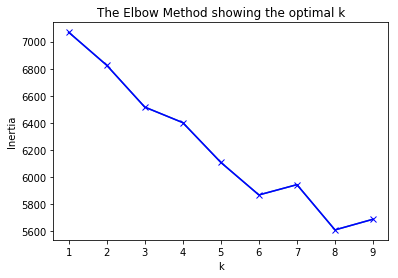

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt 

category = la_venues['Venue Category']
category = category.tolist()

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(category)

distortions = []
K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    model.fit(X)
    distortions.append(model.inertia_)

plt.figure()
plt.plot(K,distortions)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [10]:
model = KMeans(n_clusters=6, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
#for i in range(7):
#    print("Cluster %d:" % i),
#    for ind in order_centroids[i, :10]:
#        print(' %s' % terms[ind]),
#    print

#print("\n")
#print("Prediction")
#len(model.labels_)

Top terms per cluster:


In [11]:
la_venues['cl_labels1'] = model.labels_
la_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,cl_labels1
0,Lakewood,33.84871142900005,-118.11357922799999,California Sushi & Teriyaki,33.846888,-118.115684,Japanese Restaurant,2
1,Lakewood,33.84871142900005,-118.11357922799999,Starbucks,33.846731,-118.116127,Coffee Shop,1
2,Lakewood,33.84871142900005,-118.11357922799999,Ralphs,33.848014,-118.115557,Supermarket,0
3,Lakewood,33.84871142900005,-118.11357922799999,99 Cents Only Stores,33.847387,-118.117002,Discount Store,0
4,Lakewood,33.84871142900005,-118.11357922799999,McDonald's,33.846284,-118.115973,Fast Food Restaurant,2
5,Lakewood,33.84871142900005,-118.11357922799999,7-Eleven,33.846561,-118.116743,Convenience Store,0
6,Lakewood,33.84871142900005,-118.11357922799999,Redbox,33.846987,-118.117119,Video Store,0
7,Lakewood,33.84871142900005,-118.11357922799999,Taco Bell,33.846726,-118.117500,Fast Food Restaurant,2
8,Lakewood,33.84871142900005,-118.11357922799999,John's Liqour,33.846216,-118.113105,Smoke Shop,1
9,Lakewood,33.84871142900005,-118.11357922799999,Jack in the Box,33.846741,-118.117181,Fast Food Restaurant,2


## Plot Word Cloud of Venue Category Labels

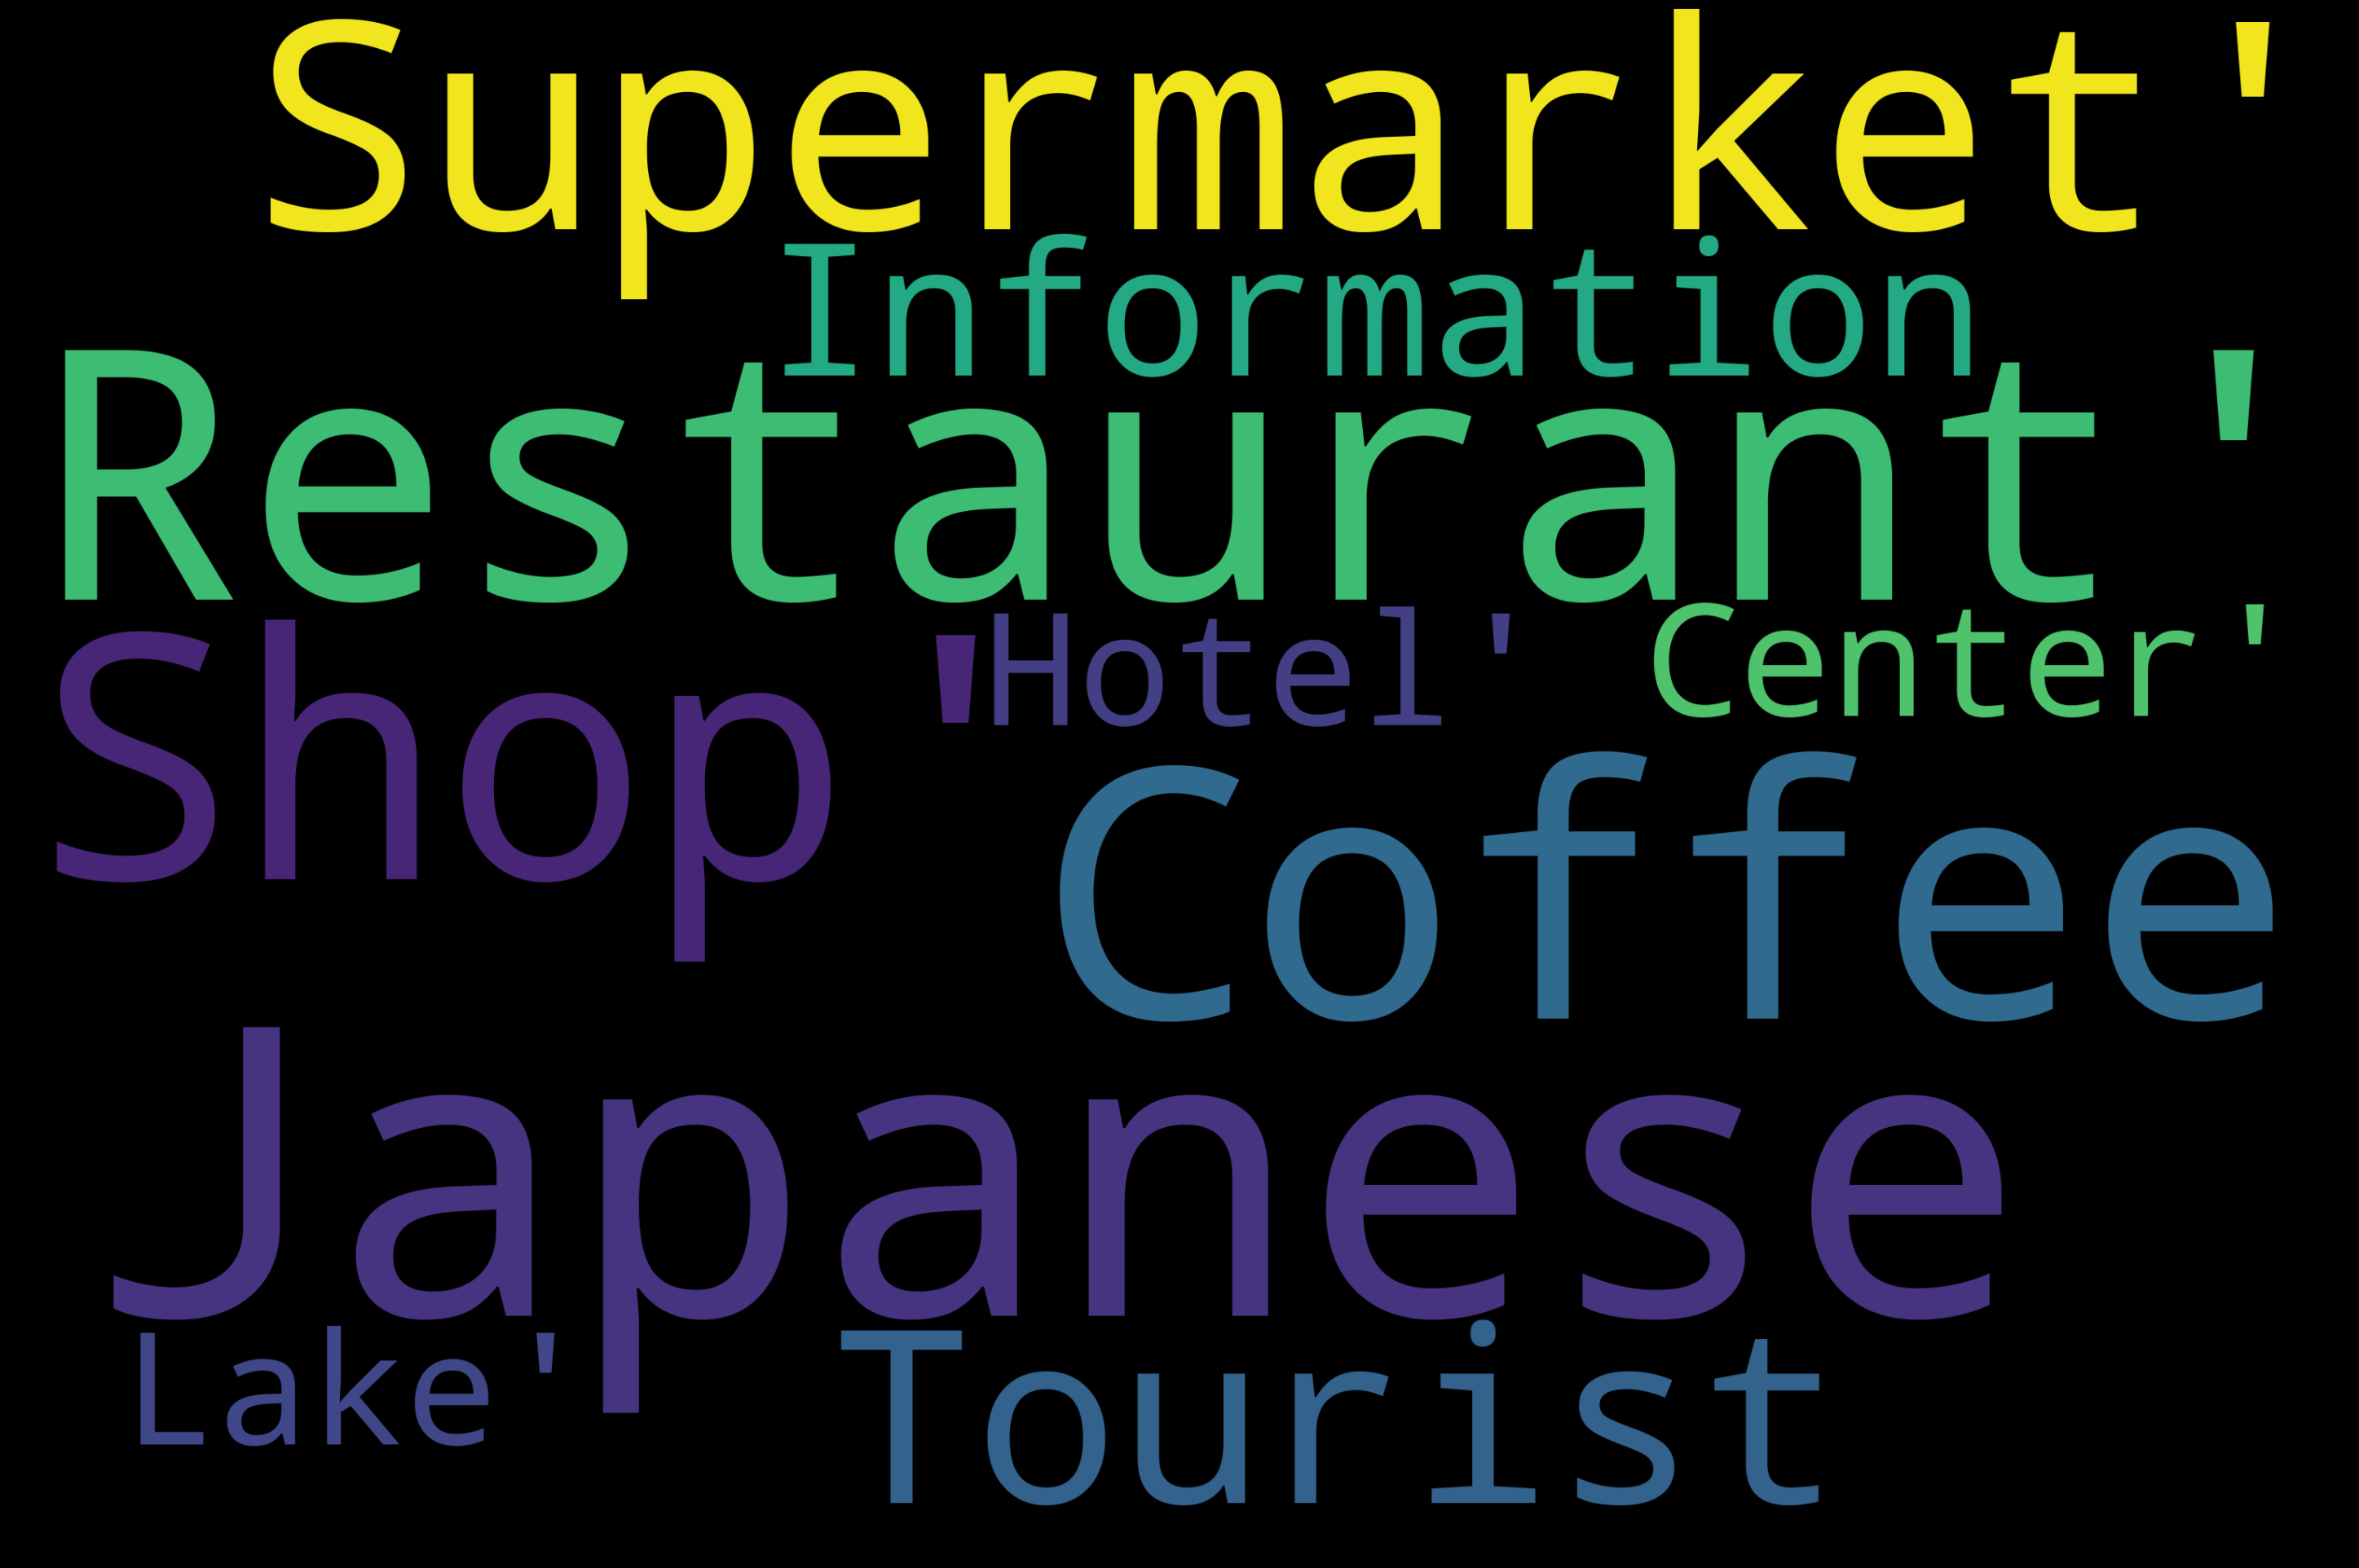

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = la_venues['Venue Category'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Group Venues

In [13]:
# one hot encoding
lavenues_onehot = pd.get_dummies(la_venues[['Venue Category']])#, prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lavenues_onehot['Neighborhood'] = la_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [lavenues_onehot.columns[-1]] + list(lavenues_onehot.columns[:-1])
lavenues_onehot = lavenues_onehot[fixed_columns]

lavenues_onehot.head()

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Advertising Agency,Venue Category_Afghan Restaurant,Venue Category_African Restaurant,Venue Category_Airport,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_American Restaurant,...,Venue Category_Water Park,Venue Category_Weight Loss Center,Venue Category_Whisky Bar,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Winery,Venue Category_Wings Joint,Venue Category_Women's Store,Venue Category_Yoga Studio,Venue Category_Zoo
0,Lakewood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Lakewood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lakewood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lakewood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Lakewood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
la_grouped = lavenues_onehot.groupby('Neighborhood').mean().reset_index()
la_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Advertising Agency,Venue Category_Afghan Restaurant,Venue Category_African Restaurant,Venue Category_Airport,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_American Restaurant,...,Venue Category_Water Park,Venue Category_Weight Loss Center,Venue Category_Whisky Bar,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Winery,Venue Category_Wings Joint,Venue Category_Women's Store,Venue Category_Yoga Studio,Venue Category_Zoo
0,Acton,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,Agoura Hills,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.028986,...,0.0,0.0,0.0,0.000000,0.000000,0.014493,0.000000,0.000000,0.000000,0.0
2,Alhambra,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.017857,0.000000,0.000000,0.035714,0.000000,0.000000,0.0
3,Altadena,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,Anaheim,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,Arcadia,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.013514,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,Artesia,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,Avalon,0.033333,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.033333,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,Azusa,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,Baldwin Park,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [15]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [16]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = la_grouped['Neighborhood']

for ind in np.arange(la_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(la_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acton,Venue Category_Fast Food Restaurant,Venue Category_Convenience Store,Venue Category_Gas Station,Venue Category_Sandwich Place,Venue Category_Sushi Restaurant,Venue Category_Pet Store,Venue Category_Empanada Restaurant,Venue Category_English Restaurant,Venue Category_Event Service,Venue Category_Event Space
1,Agoura Hills,Venue Category_Bakery,Venue Category_Chinese Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Deli / Bodega,Venue Category_Breakfast Spot,Venue Category_Mexican Restaurant,Venue Category_Coffee Shop,Venue Category_Multiplex,Venue Category_Thai Restaurant,Venue Category_BBQ Joint
2,Alhambra,Venue Category_Burger Joint,Venue Category_Bakery,Venue Category_Pizza Place,Venue Category_Market,Venue Category_Vietnamese Restaurant,Venue Category_Italian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Seafood Restaurant,Venue Category_Wings Joint
3,Altadena,Venue Category_Campground,Venue Category_Scenic Lookout,Venue Category_Zoo,Venue Category_Farm,Venue Category_Empanada Restaurant,Venue Category_English Restaurant,Venue Category_Event Service,Venue Category_Event Space,Venue Category_Exhibit,Venue Category_Eye Doctor
4,Anaheim,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Sushi Restaurant,Venue Category_Juice Bar,Venue Category_Brewery,Venue Category_Park,Venue Category_Chinese Restaurant,Venue Category_Speakeasy,Venue Category_Southern / Soul Food Restaurant,Venue Category_Burger Joint


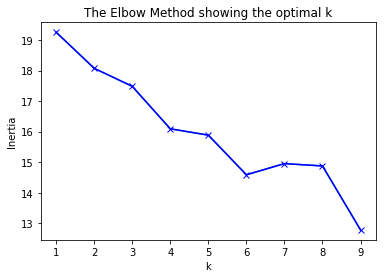

In [78]:
la_grouped_clustering = la_grouped.drop('Neighborhood', 1)

distortions = []
K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    model.fit(la_grouped_clustering)
    distortions.append(model.inertia_)

plt.figure()
plt.plot(K,distortions)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [18]:
model1 = KMeans(n_clusters=6, init='k-means++', max_iter=100, n_init=1)
model1.fit(la_grouped_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=6, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
model1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       5, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
#merge data
##Add Lat Long for hoods and cluster labels
la_merged = neighborhoods_venues_sorted
la_merged['Cluster Labels'] = model1.labels_
la_merged['Lat'] = ""
la_merged['Long'] = ""

In [21]:
for i in range(len(la_merged)):
    for j, row in la_venues.iterrows():
        if la_merged.at[i,'Neighborhood'] == la_venues.at[j,'Neighborhood']:
            la_merged.at[i,'Lat'] = la_venues.at[j,'Neighborhood Latitude']
            la_merged.at[i,'Long'] = la_venues.at[j,'Neighborhood Longitude']

In [22]:
# create map
kclusters = 6
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(la_merged['Lat'], la_merged['Long'], la_merged['Neighborhood'], la_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    cluster = int(cluster)
    print(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
5
0
0
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
4
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [23]:
la_merged.loc[la_merged['Cluster Labels'] == 0, la_merged.columns[[1] + list(range(5, la_merged.shape[1]))]]

,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Lat,Long
0,Venue Category_Fast Food Restaurant,Venue Category_Sushi Restaurant,Venue Category_Pet Store,Venue Category_Empanada Restaurant,Venue Category_English Restaurant,Venue Category_Event Service,Venue Category_Event Space,0,34.489013165000074,-118.19703809399999
1,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Mexican Restaurant,Venue Category_Coffee Shop,Venue Category_Multiplex,Venue Category_Thai Restaurant,Venue Category_BBQ Joint,0,34.14707426700005,-118.75386792799998
2,Venue Category_Burger Joint,Venue Category_Vietnamese Restaurant,Venue Category_Italian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Seafood Restaurant,Venue Category_Wings Joint,0,34.093891400000075,-118.12939939299997
3,Venue Category_Campground,Venue Category_Empanada Restaurant,Venue Category_English Restaurant,Venue Category_Event Service,Venue Category_Event Space,Venue Category_Exhibit,Venue Category_Eye Doctor,0,34.19036355700007,-118.13896709499994
4,Venue Category_Indian Restaurant,Venue Category_Brewery,Venue Category_Park,Venue Category_Chinese Restaurant,Venue Category_Speakeasy,Venue Category_Southern / Soul Food Restaurant,Venue Category_Burger Joint,0,33.842193921000046,-117.95265760399997
5,Venue Category_Chinese Restaurant,Venue Category_Tea Room,Venue Category_Bank,Venue Category_Japanese Restaurant,Venue Category_Pharmacy,Venue Category_Sandwich Place,Venue Category_Taiwanese Restaurant,0,34.13222303800006,-118.02498891099998
6,Venue Category_Indian Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Asian Restaurant,Venue Category_Boutique,Venue Category_Fast Food Restaurant,Venue Category_Frozen Yogurt Shop,Venue Category_Taiwanese Restaurant,0,33.86631304700006,-118.08104817199995
7,Venue Category_Hotel,Venue Category_Grocery Store,Venue Category_American Restaurant,Venue Category_ATM,Venue Category_Pizza Place,Venue Category_Ice Cream Shop,Venue Category_Dive Spot,0,33.34416070100008,-118.32659746799999
8,Venue Category_Mexican Restaurant,Venue Category_Event Service,Venue Category_Event Space,Venue Category_Exhibit,Venue Category_Eye Doctor,Venue Category_Fabric Shop,Venue Category_Falafel Restaurant,0,34.12712200200008,-117.90620949499998
9,Venue Category_Grocery Store,Venue Category_Donut Shop,Venue Category_Asian Restaurant,Venue Category_Mexican Restaurant,Venue Category_Liquor Store,Venue Category_Supermarket,Venue Category_Pharmacy,0,34.08512317900005,-117.96798678399995


In [24]:
la_merged.loc[la_merged['Cluster Labels'] == 1, la_merged.columns[[1] + list(range(5, la_merged.shape[1]))]]

,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Lat,Long
57,Venue Category_Pub,Venue Category_Event Service,Venue Category_Event Space,Venue Category_Exhibit,Venue Category_Eye Doctor,Venue Category_Fabric Shop,Venue Category_Falafel Restaurant,1,34.679133225000044,-118.44771884099998


In [25]:
la_merged.loc[la_merged['Cluster Labels'] == 2, la_merged.columns[[1] + list(range(5, la_merged.shape[1]))]]

,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Lat,Long
96,Venue Category_Food,Venue Category_Event Service,Venue Category_Event Space,Venue Category_Exhibit,Venue Category_Eye Doctor,Venue Category_Fabric Shop,Venue Category_Falafel Restaurant,2,33.76310178600005,-118.36665841799999


In [26]:
la_merged.loc[la_merged['Cluster Labels'] == 3, la_merged.columns[[1] + list(range(5, la_merged.shape[1]))]]

,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Lat,Long
21,Venue Category_Park,Venue Category_English Restaurant,Venue Category_Event Service,Venue Category_Event Space,Venue Category_Exhibit,Venue Category_Eye Doctor,Venue Category_Fabric Shop,3,34.47299313000008,-118.63613565899999
62,Venue Category_Park,Venue Category_Event Service,Venue Category_Event Space,Venue Category_Exhibit,Venue Category_Eye Doctor,Venue Category_Fabric Shop,Venue Category_Falafel Restaurant,3,34.53302372600007,-117.95804975599998


In [27]:
la_merged.loc[la_merged['Cluster Labels'] == 4, la_merged.columns[[1] + list(range(5, la_merged.shape[1]))]]

,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Lat,Long
25,Venue Category_State / Provincial Park,Venue Category_Event Service,Venue Category_Event Space,Venue Category_Exhibit,Venue Category_Eye Doctor,Venue Category_Fabric Shop,Venue Category_Falafel Restaurant,4,33.97585063500003,-117.72535733099994
61,Venue Category_State / Provincial Park,Venue Category_Event Service,Venue Category_Event Space,Venue Category_Exhibit,Venue Category_Eye Doctor,Venue Category_Fabric Shop,Venue Category_Falafel Restaurant,4,34.874840963000054,-118.88918877999998


In [28]:
la_merged.loc[la_merged['Cluster Labels'] == 5, la_merged.columns[[1] + list(range(5, la_merged.shape[1]))]]

,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Lat,Long
22,Venue Category_Food Truck,Venue Category_Event Space,Venue Category_Exhibit,Venue Category_Eye Doctor,Venue Category_Fabric Shop,Venue Category_Falafel Restaurant,Venue Category_Farm,5,33.86693003700003,-118.06904726699997


## New Data Frames Based on Label Clustering

In [29]:
cl_1 = la_venues[la_venues['cl_labels1'] == 0]
cl_2 = la_venues[la_venues['cl_labels1'] == 1]
cl_3 = la_venues[la_venues['cl_labels1'] == 2]
cl_4 = la_venues[la_venues['cl_labels1'] == 3]
cl_5 = la_venues[la_venues['cl_labels1'] == 4]
cl_6 = la_venues[la_venues['cl_labels1'] == 5]
#cl_7 = la_venues[la_venues['cl_labels1'] == 6]

In [30]:
cl_5

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,cl_labels1
169,Pasadena,34.16700046200003,-118.12758752599996,Seed Bakery,34.168960,-118.131233,Bakery,4
227,Los Angeles,34.030771505000075,-118.31686899999994,El Valle Oaxaqueno Bakery,34.028922,-118.312756,Bakery,4
232,Long Beach,33.79831371000006,-118.15136774099994,Rossmoor Pastries,33.799129,-118.151589,Bakery,4
340,Glendale,34.14431084300003,-118.25610844299996,85C Bakery Cafe,34.148222,-118.255239,Bakery,4
375,Los Angeles,34.00349356000004,-118.28709702299994,Guatepan Bakery,34.003695,-118.291114,Bakery,4
473,Glendale,34.163611358000026,-118.26495921899999,Lord & Villa Bakery,34.161551,-118.264416,Bakery,4
489,La Mirada,33.90267205300006,-118.00708748799997,Panera Bread,33.898283,-118.006783,Bakery,4
514,Los Angeles,33.961520807000056,-118.39344972199996,Westchester Bakery,33.958585,-118.394166,Bakery,4
521,Los Angeles,33.961520807000056,-118.39344972199996,Panera Bread,33.958532,-118.396644,Bakery,4
606,Santa Monica,34.01760179300004,-118.49296772799994,Le Pain Quotidien,34.015856,-118.495531,Bakery,4


## Plot Label Clusters

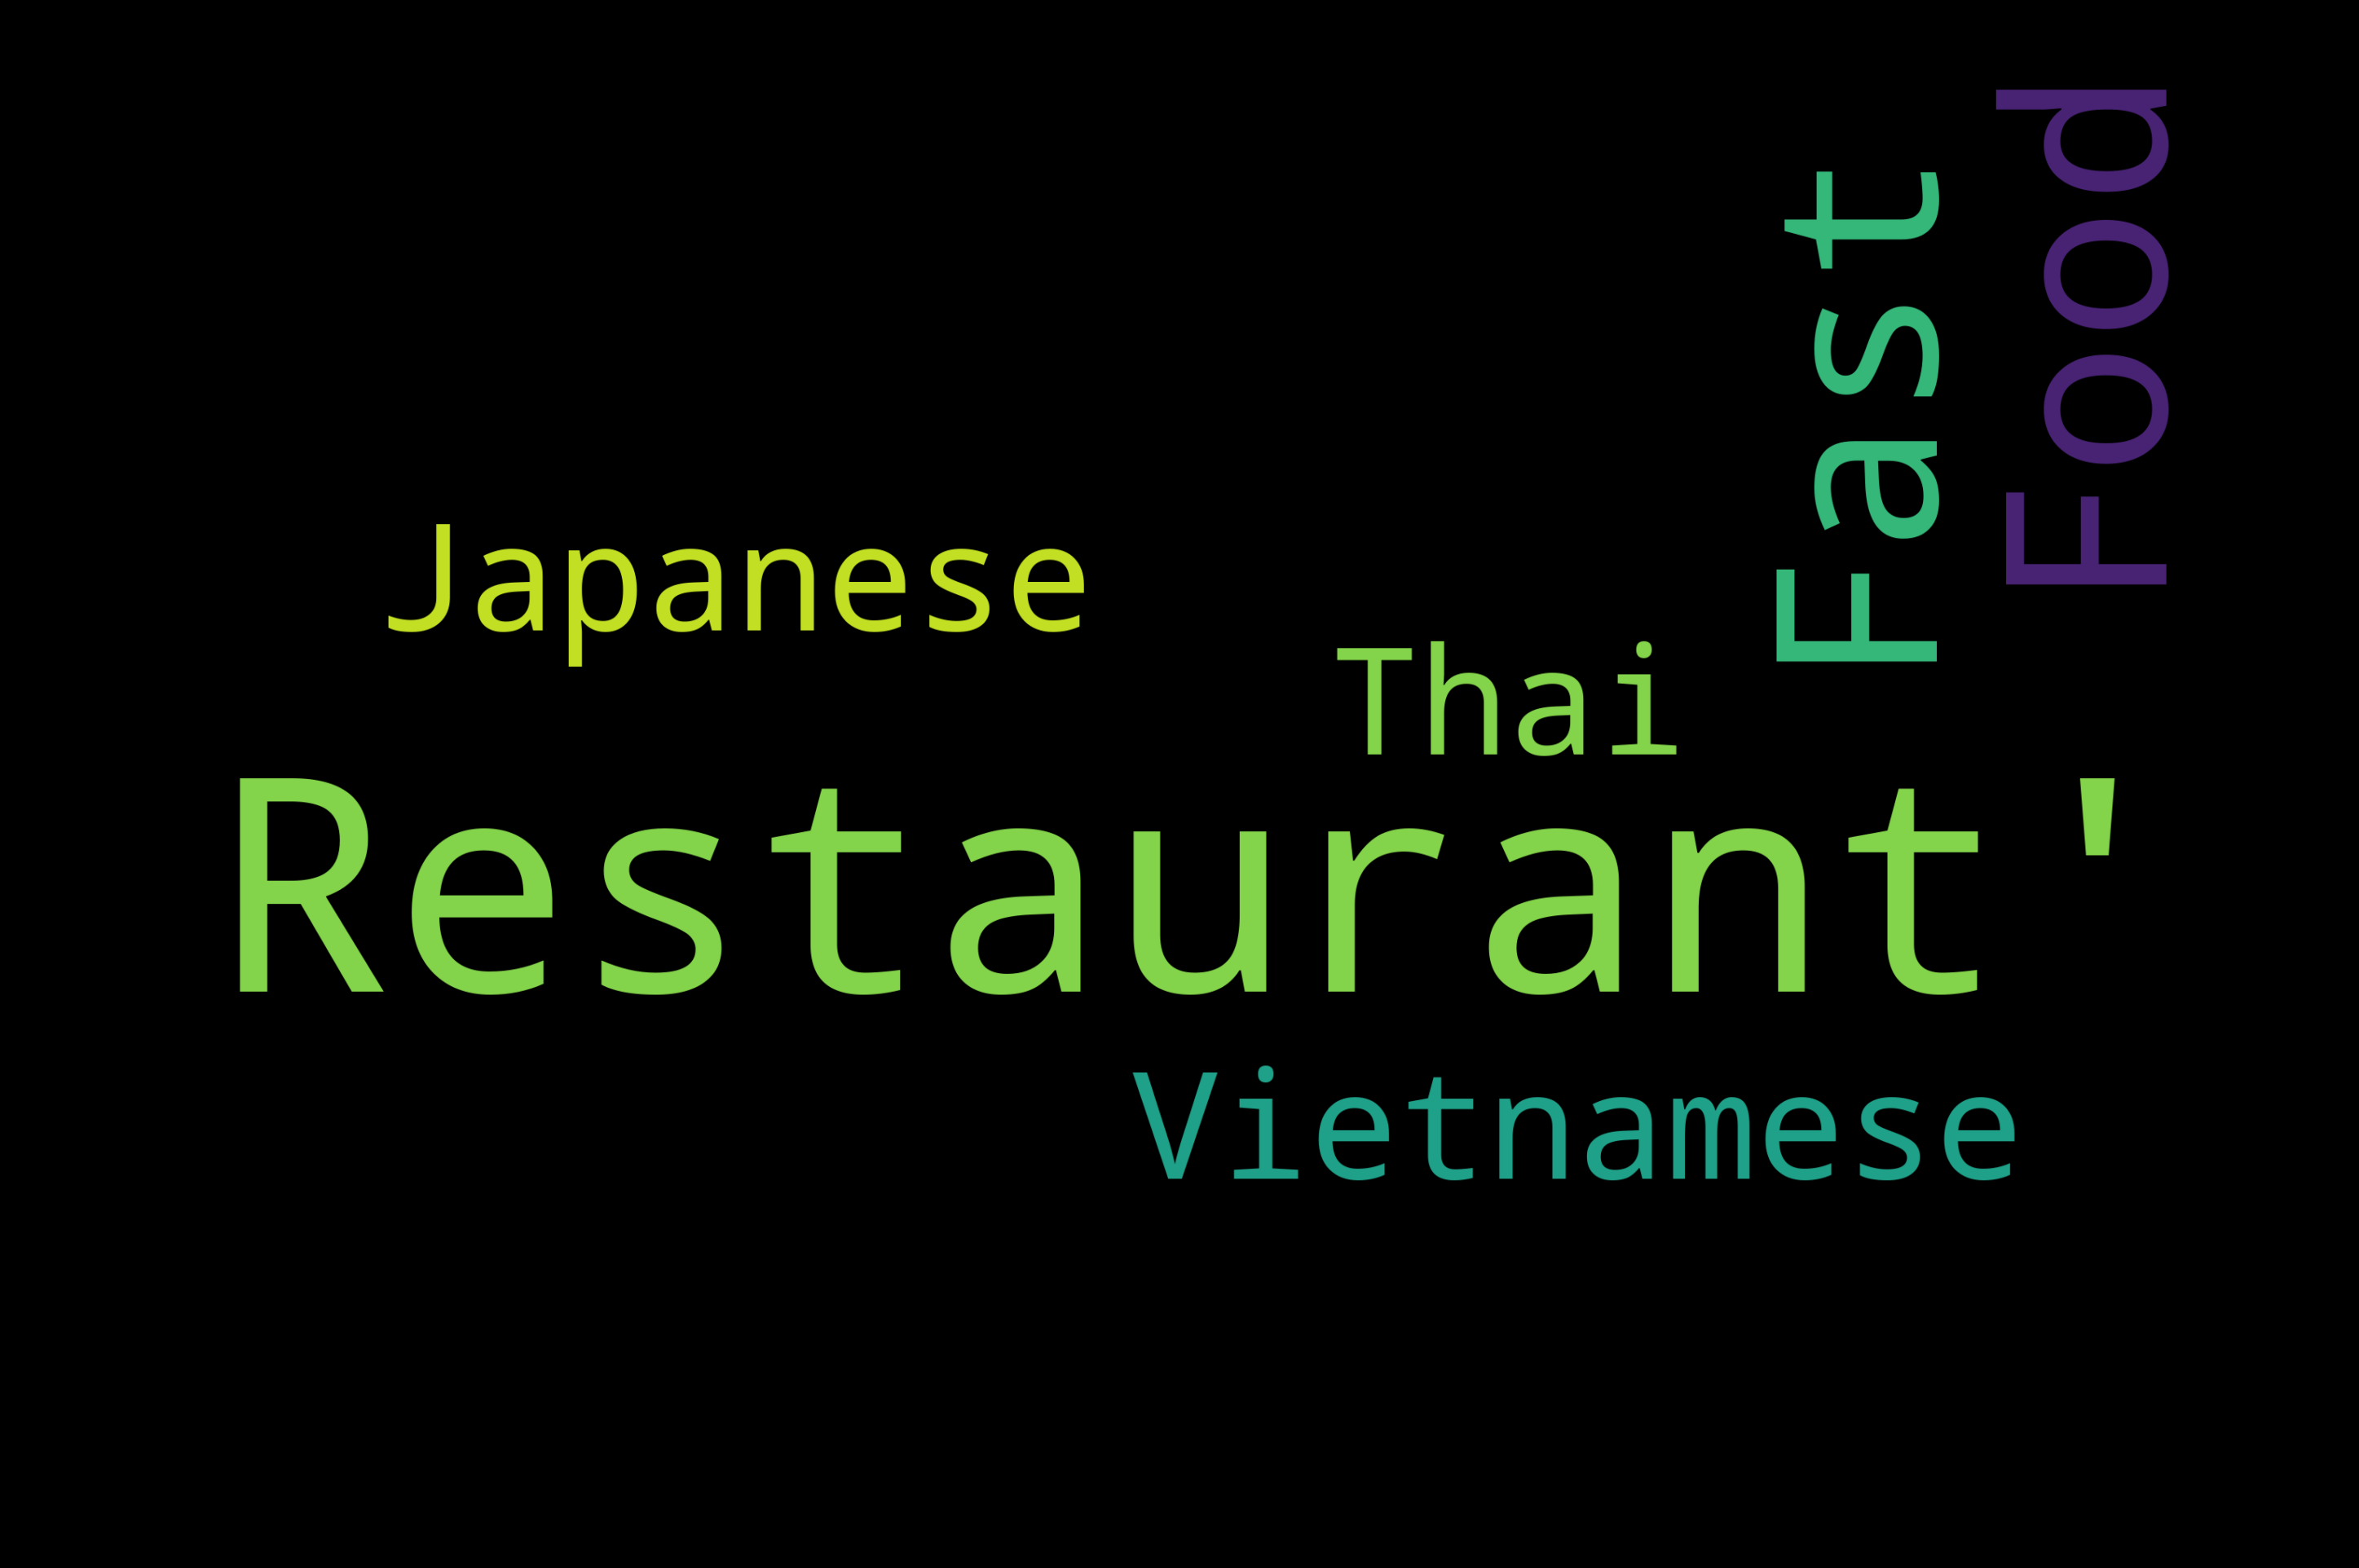

In [95]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = cl_3['Venue Category'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## One Hot Encode Clusters and Get Frequencies

In [32]:
# one hot encoding
cl1_onehot = pd.get_dummies(cl_1[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cl1_onehot['Neighborhood'] = cl_1['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cl1_onehot.columns[-1]] + list(cl1_onehot.columns[:-1])
cl1_onehot = cl1_onehot[fixed_columns]

cl1_onehot

,Zoo,ATM,Accessories Store,Advertising Agency,Airport,Airport Service,Airport Terminal,Amphitheater,Aquarium,Arcade,...,Volleyball Court,Warehouse Store,Water Park,Weight Loss Center,Whisky Bar,Wine Bar,Winery,Wings Joint,Women's Store,Yoga Studio
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# one hot encoding
cl2_onehot = pd.get_dummies(cl_2[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cl2_onehot['Neighborhood'] = cl_2['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cl2_onehot.columns[-1]] + list(cl2_onehot.columns[:-1])
cl2_onehot = cl2_onehot[fixed_columns]


In [34]:
# one hot encoding
cl3_onehot = pd.get_dummies(cl_3[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cl3_onehot['Neighborhood'] = cl_3['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cl3_onehot.columns[-1]] + list(cl3_onehot.columns[:-1])
cl3_onehot = cl3_onehot[fixed_columns]

In [35]:
# one hot encoding
cl4_onehot = pd.get_dummies(cl_4[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cl4_onehot['Neighborhood'] = cl_4['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cl4_onehot.columns[-1]] + list(cl4_onehot.columns[:-1])
cl4_onehot = cl4_onehot[fixed_columns]

In [36]:
# one hot encoding
cl5_onehot = pd.get_dummies(cl_5[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cl5_onehot['Neighborhood'] = cl_5['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cl5_onehot.columns[-1]] + list(cl5_onehot.columns[:-1])
cl5_onehot = cl5_onehot[fixed_columns]

In [37]:
# one hot encoding
cl6_onehot = pd.get_dummies(cl_6[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cl6_onehot['Neighborhood'] = cl_6['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cl6_onehot.columns[-1]] + list(cl6_onehot.columns[:-1])
cl6_onehot = cl6_onehot[fixed_columns]

In [38]:
cl1_grouped = cl1_onehot.groupby('Neighborhood').mean().reset_index()
cl1_grouped['Sum'] = cl1_grouped.sum(axis=1)
cl1_grouped

,Neighborhood,Zoo,ATM,Accessories Store,Advertising Agency,Airport,Airport Service,Airport Terminal,Amphitheater,Aquarium,...,Warehouse Store,Water Park,Weight Loss Center,Whisky Bar,Wine Bar,Winery,Wings Joint,Women's Store,Yoga Studio,Sum
0,Acton,0.0,0.000000,0.000,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,Agoura Hills,0.0,0.000000,0.000,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.030303,0.000000,0.000000,0.000000,1.0
2,Alhambra,0.0,0.000000,0.000,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.035714,0.000000,0.071429,0.000000,0.000000,1.0
3,Altadena,0.0,0.000000,0.000,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
4,Anaheim,0.0,0.000000,0.000,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.045455,0.000000,0.000000,0.000000,0.000000,1.0
5,Arcadia,0.0,0.000000,0.000,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
6,Artesia,0.0,0.000000,0.000,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
7,Avalon,0.0,0.048780,0.000,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
8,Azusa,0.0,0.000000,0.000,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
9,Baldwin Park,0.0,0.000000,0.000,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [39]:
cl2_grouped = cl2_onehot.groupby('Neighborhood').mean().reset_index()
cl2_grouped['Sum'] = cl2_grouped.sum(axis=1)
cl2_grouped

,Neighborhood,Antique Shop,Automotive Shop,Bagel Shop,Bike Shop,Board Shop,Bridal Shop,Bubble Tea Shop,Cheese Shop,Chocolate Shop,...,Shop & Service,Smoke Shop,Smoothie Shop,Souvenir Shop,Sporting Goods Shop,Supplement Shop,Tailor Shop,Watch Shop,Wine Shop,Sum
0,Agoura Hills,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.00,0.000000,0.000000,1.0
1,Alhambra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.0
2,Anaheim,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.0
3,Arcadia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.10,0.000000,0.000000,1.0
4,Artesia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.0
5,Avalon,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.00,0.000000,0.000000,1.0
6,Baldwin Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.0
7,Bell,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.0
8,Bellflower,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.0
9,Beverly Hills,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.0


In [40]:
cl3_grouped = cl3_onehot.groupby('Neighborhood').mean().reset_index()
cl3_grouped['Sum'] = cl3_grouped.sum(axis=1)
cl3_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cantonese Restaurant,...,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Sum
0,Acton,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,...,0.333333,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.0
1,Agoura Hills,0.000000,0.0,0.086957,0.000000,0.043478,0.0,0.000000,0.0000,0.000000,...,0.086957,0.0000,0.000000,0.0,0.086957,0.0,0.0,0.000000,0.000000,1.0
2,Alhambra,0.000000,0.0,0.000000,0.000000,0.062500,0.0,0.000000,0.0625,0.000000,...,0.125000,0.0625,0.000000,0.0,0.062500,0.0,0.0,0.000000,0.125000,1.0
3,Anaheim,0.000000,0.0,0.000000,0.000000,0.090909,0.0,0.000000,0.0000,0.000000,...,0.181818,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.090909,1.0
4,Arcadia,0.000000,0.0,0.037037,0.000000,0.111111,0.0,0.000000,0.0000,0.037037,...,0.037037,0.0000,0.074074,0.0,0.074074,0.0,0.0,0.000000,0.000000,1.0
5,Artesia,0.000000,0.0,0.000000,0.000000,0.047619,0.0,0.000000,0.0000,0.000000,...,0.000000,0.0000,0.047619,0.0,0.047619,0.0,0.0,0.047619,0.095238,1.0
6,Avalon,0.000000,0.0,0.200000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,...,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.0
7,Azusa,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,...,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.0
8,Baldwin Park,0.000000,0.0,0.000000,0.000000,0.200000,0.0,0.000000,0.0000,0.000000,...,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.0
9,Bell,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,...,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.0


In [41]:
cl4_grouped = cl4_onehot.groupby('Neighborhood').mean().reset_index()
cl4_grouped['Sum'] = cl4_grouped.sum(axis=1)
cl4_grouped

,Neighborhood,Café,Sum
0,Agoura Hills,1,1
1,Alhambra,1,1
2,Anaheim,1,1
3,Arcadia,1,1
4,Avalon,1,1
5,Beverly Hills,1,1
6,Buena Park,1,1
7,Burbank,1,1
8,Calabasas,1,1
9,Canoga Park,1,1


In [42]:
cl5_grouped = cl5_onehot.groupby('Neighborhood').mean().reset_index()
cl5_grouped['Sum'] = cl5_grouped.sum(axis=1)
cl5_grouped

,Neighborhood,Bakery,Sum
0,Agoura Hills,1,1
1,Alhambra,1,1
2,Anaheim,1,1
3,Arcadia,1,1
4,Artesia,1,1
5,Avalon,1,1
6,Beverly Hills,1,1
7,Burbank,1,1
8,Calabasas,1,1
9,Carson,1,1


In [43]:
cl6_grouped = cl6_onehot.groupby('Neighborhood').mean().reset_index()
cl6_grouped['Sum'] = cl6_grouped.sum(axis=1)
cl6_grouped

,Neighborhood,Pizza Place,Poke Place,Salad Place,Sandwich Place,Snack Place,Taco Place,Sum
0,Acton,0.000000,0.000000,0.000000,1.000000,0.00,0.000000,1.0
1,Agoura Hills,1.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.0
2,Alhambra,0.666667,0.000000,0.000000,0.000000,0.00,0.333333,1.0
3,Anaheim,0.333333,0.000000,0.333333,0.333333,0.00,0.000000,1.0
4,Arcadia,0.250000,0.250000,0.000000,0.500000,0.00,0.000000,1.0
5,Artesia,0.500000,0.000000,0.000000,0.500000,0.00,0.000000,1.0
6,Avalon,1.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.0
7,Azusa,0.000000,0.000000,0.000000,0.000000,0.00,1.000000,1.0
8,Baldwin Park,1.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.0
9,Bell Gardens,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,1.0


In [44]:
cl2_grouped = cl2_grouped.drop(['Sum'], axis=1)
cl2_grouped

,Neighborhood,Antique Shop,Automotive Shop,Bagel Shop,Bike Shop,Board Shop,Bridal Shop,Bubble Tea Shop,Cheese Shop,Chocolate Shop,...,Record Shop,Shop & Service,Smoke Shop,Smoothie Shop,Souvenir Shop,Sporting Goods Shop,Supplement Shop,Tailor Shop,Watch Shop,Wine Shop
0,Agoura Hills,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.00,0.000000,0.000000
1,Alhambra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,Anaheim,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
3,Arcadia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.10,0.000000,0.000000
4,Artesia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,Avalon,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.00,0.000000,0.000000
6,Baldwin Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
7,Bell,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
8,Bellflower,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
9,Beverly Hills,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000


## Find Top 10 Restaurants Accross Cities

In [125]:
##SORT, KMEANS, PLOT, LIST
##CL2_grouped contains restaurants
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = cl3_grouped['Neighborhood']

for ind in np.arange(cl3_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cl3_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acton,Sum,Fast Food Restaurant,Sushi Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Dongbei Restaurant
1,Agoura Hills,Sum,Chinese Restaurant,Fast Food Restaurant,Mexican Restaurant,Restaurant,American Restaurant,Thai Restaurant,Sushi Restaurant,Asian Restaurant,Indian Restaurant
2,Alhambra,Sum,Sushi Restaurant,Italian Restaurant,Vietnamese Restaurant,Seafood Restaurant,Indonesian Restaurant,Mexican Restaurant,Dumpling Restaurant,Burmese Restaurant,Indian Restaurant
3,Anaheim,Sum,Indian Restaurant,Sushi Restaurant,Chinese Restaurant,Vietnamese Restaurant,Asian Restaurant,Comfort Food Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Mexican Restaurant
4,Arcadia,Sum,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Fast Food Restaurant,Thai Restaurant,Taiwanese Restaurant,Dumpling Restaurant,Korean Restaurant,American Restaurant
5,Artesia,Sum,Indian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Taiwanese Restaurant,Asian Restaurant,Fast Food Restaurant,German Restaurant
6,Avalon,Sum,Seafood Restaurant,American Restaurant,Caribbean Restaurant,Mexican Restaurant,New American Restaurant,Italian Restaurant,Brazilian Restaurant,Burmese Restaurant,Indian Restaurant
7,Azusa,Sum,Mexican Restaurant,Dumpling Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant
8,Baldwin Park,Sum,Fast Food Restaurant,Asian Restaurant,Chinese Restaurant,Mexican Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Empanada Restaurant,Greek Restaurant
9,Bell,Sum,Mexican Restaurant,Latin American Restaurant,New American Restaurant,Fast Food Restaurant,Indian Chinese Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant


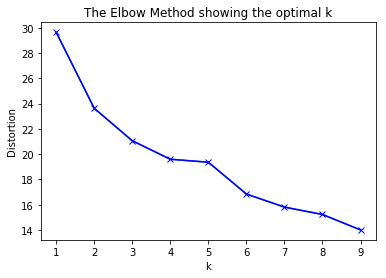

In [126]:
cl3_grouped_clustering = cl3_grouped.drop('Neighborhood', 1)

distortions = []
K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    model.fit(cl3_grouped_clustering)
    distortions.append(model.inertia_)

plt.figure()
plt.plot(K,distortions)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## K-Means on Restaurant Cluster

In [127]:
model2 = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)
model2.fit(cl3_grouped_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [128]:
#merge data
##Add Lat Long for hoods and cluster labels
cl3_merged = neighborhoods_venues_sorted
cl3_merged['Cluster Labels'] = model2.labels_
cl3_merged['Lat'] = ""
cl3_merged['Long'] = ""

In [129]:
cl_3 = cl_3.drop(['cl_labels1'], axis=1)

KeyError: "labels ['cl_labels1'] not contained in axis"

In [130]:
for i in range(len(cl3_merged)):
    for j, row in cl_3.iterrows():
        if cl3_merged.at[i,'Neighborhood'] == cl_3.at[j,'Neighborhood']:
            cl3_merged.at[i,'Lat'] = cl_3.at[j,'Neighborhood Latitude']
            cl3_merged.at[i,'Long'] = cl_3.at[j,'Neighborhood Longitude']

## Plot Clusters

In [131]:
# create map
kclusters = 3
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cl3_merged['Lat'], cl3_merged['Long'], cl3_merged['Neighborhood'], cl3_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    cluster = int(cluster)
    print(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

1
1
0
1
1
1
1
2
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
2
2
1
1
1
1
1
1
2
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
2
1
1
0
1
1
2
1
1
2
1
1
0
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1


## First Cluster [Diverse Restaurants]

In [135]:
split1 = cl3_merged[cl3_merged['Cluster Labels'] == 0]
split2 = cl3_merged[cl3_merged['Cluster Labels'] == 1]
split3 = cl3_merged[cl3_merged['Cluster Labels'] == 2]
split1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Lat,Long
2,Alhambra,Sum,Sushi Restaurant,Italian Restaurant,Vietnamese Restaurant,Seafood Restaurant,Indonesian Restaurant,Mexican Restaurant,Dumpling Restaurant,Burmese Restaurant,Indian Restaurant,0,34.093891400000075,-118.12939939299997
26,Cypress,Sum,Thai Restaurant,Fast Food Restaurant,Italian Restaurant,Vietnamese Restaurant,American Restaurant,Argentinian Restaurant,English Restaurant,Indonesian Restaurant,Indian Restaurant,0,33.82014301800007,-118.03980972399995
73,Palos Verdes Peninsula,Sum,Thai Restaurant,Chinese Restaurant,Mexican Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,0,33.77664082300004,-118.37785984199996
82,Reseda,Sum,Vietnamese Restaurant,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Seafood Restaurant,Greek Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,0,34.200183269000036,-118.54031959799994


## Second Cluster [Mexican-Asian]

In [136]:
split2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Lat,Long
0,Acton,Sum,Fast Food Restaurant,Sushi Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Dongbei Restaurant,1,34.489013165000074,-118.19703809399999
1,Agoura Hills,Sum,Chinese Restaurant,Fast Food Restaurant,Mexican Restaurant,Restaurant,American Restaurant,Thai Restaurant,Sushi Restaurant,Asian Restaurant,Indian Restaurant,1,34.14707426700005,-118.75386792799998
3,Anaheim,Sum,Indian Restaurant,Sushi Restaurant,Chinese Restaurant,Vietnamese Restaurant,Asian Restaurant,Comfort Food Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Mexican Restaurant,1,33.83284346900007,-117.90784756199997
4,Arcadia,Sum,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Fast Food Restaurant,Thai Restaurant,Taiwanese Restaurant,Dumpling Restaurant,Korean Restaurant,American Restaurant,1,34.13222303800006,-118.02498891099998
5,Artesia,Sum,Indian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Taiwanese Restaurant,Asian Restaurant,Fast Food Restaurant,German Restaurant,1,33.86631304700006,-118.08104817199995
6,Avalon,Sum,Seafood Restaurant,American Restaurant,Caribbean Restaurant,Mexican Restaurant,New American Restaurant,Italian Restaurant,Brazilian Restaurant,Burmese Restaurant,Indian Restaurant,1,33.34416070100008,-118.32659746799999
8,Baldwin Park,Sum,Fast Food Restaurant,Asian Restaurant,Chinese Restaurant,Mexican Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Empanada Restaurant,Greek Restaurant,1,34.08512317900005,-117.96798678399995
9,Bell,Sum,Mexican Restaurant,Latin American Restaurant,New American Restaurant,Fast Food Restaurant,Indian Chinese Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,1,33.96823384100003,-118.15010768899998
11,Bellflower,Sum,Mexican Restaurant,Chinese Restaurant,Sushi Restaurant,Korean Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,Dumpling Restaurant,1,33.88544410600008,-118.12830879699999
12,Beverly Hills,Sum,American Restaurant,Sushi Restaurant,Restaurant,Indian Restaurant,Italian Restaurant,New American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Chinese Restaurant,1,34.06566189900008,-118.38146619699995


## Third Cluster [Fast Food-Asian]

In [137]:
split3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Lat,Long
7,Azusa,Sum,Mexican Restaurant,Dumpling Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,2,34.12712200200008,-117.90620949499998
10,Bell Gardens,Sum,Mexican Restaurant,Fast Food Restaurant,Dumpling Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,2,33.969580792000045,-118.17504802099995
13,Brea,Sum,Mexican Restaurant,Japanese Restaurant,Udon Restaurant,Dongbei Restaurant,Indian Chinese Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,2,33.922841568000024,-117.89508628099998
30,El Monte,Sum,Mexican Restaurant,Fast Food Restaurant,Thai Restaurant,English Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,2,34.078814231000024,-118.03912755899995
31,El Segundo,Sum,Mexican Restaurant,Dumpling Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,2,33.92015201000004,-118.40580691799994
38,Harbor City,Sum,Sushi Restaurant,Mexican Restaurant,Indian Chinese Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,Dumpling Restaurant,Indian Restaurant,2,33.79480294600006,-118.29872860199998
39,Hawaiian Gardens,Sum,Mexican Restaurant,Peruvian Restaurant,Fast Food Restaurant,Persian Restaurant,Korean Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,Hotpot Restaurant,2,33.831370512000035,-118.07144570999998
43,Huntington Park,Sum,Mexican Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,English Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,2,33.97867054400007,-118.21899775099996
58,Maywood,Sum,Mexican Restaurant,Fast Food Restaurant,Dumpling Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,2,33.98850329100003,-118.18894769299999
61,Montebello,Sum,Mexican Restaurant,American Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Dumpling Restaurant,Greek Restaurant,2,34.01403019900005,-118.11318817699998


In [55]:
cl2_onehot.groupby('Neighborhood').mean()

,Antique Shop,Automotive Shop,Bagel Shop,Bike Shop,Board Shop,Bridal Shop,Bubble Tea Shop,Cheese Shop,Chocolate Shop,Coffee Shop,...,Record Shop,Shop & Service,Smoke Shop,Smoothie Shop,Souvenir Shop,Sporting Goods Shop,Supplement Shop,Tailor Shop,Watch Shop,Wine Shop
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Agoura Hills,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.00,0.000000,0.000000
Alhambra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
Anaheim,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
Arcadia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.10,0.000000,0.000000
Artesia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
Avalon,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.00,0.000000,0.000000
Baldwin Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
Bell,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
Bellflower,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000


In [56]:
##First model helped find venues that are restaurants, second model opened the possibility to compare significant differences in restaurant frequency per neighborhood
##Stats to find significant differences in frequency should be done and descriptive stats to show differences among neighborhoods 